In [4]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [7]:
def gb_predict(X, trees_list, eta):
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )
    return predictions

In [8]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [9]:
def residual(y, z):
    return - (z - y)

In [10]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            target = gb_predict(X_train, trees, eta)            
            tree.fit(X_train, residual(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [12]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [136]:
def get_error_plot(n_trees, train_err, test_err, n_trees_1, train_err_1, test_err_1, n_trees_2, train_err_2, test_err_2):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, max([n_trees, n_trees_1, n_trees_2]))
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.plot(list(range(n_trees_1)), train_err_1, label='train error 1')
    plt.plot(list(range(n_trees_1)), test_err_1, label='test error 1')
    plt.plot(list(range(n_trees_2)), train_err_2, label='train error 2')
    plt.plot(list(range(n_trees_2)), test_err_2, label='test error 2')

    plt.legend(loc='upper right')
    plt.show()

Построим графики зависимости ошибки на обучающей и тестовой выборках от числа деревьев.

In [133]:
n_trees = 10
n_trees_1 = 50
n_trees_2 = 3

max_depth = 3

eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Увеличим число деревьев.

In [132]:
%%time


trees_1, train_errors_1, test_errors_1 = gb_fit(n_trees_1, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 46.2 s


In [134]:
%%time

trees_2, train_errors_2, test_errors_2 = gb_fit(n_trees_2, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 125 ms


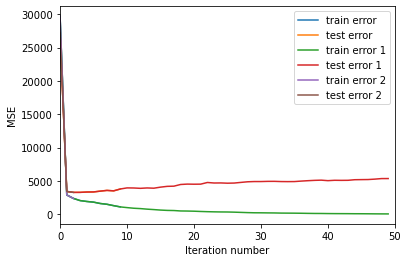

In [137]:
get_error_plot(n_trees, train_errors, test_errors, n_trees_1, train_errors_1, test_errors_1, n_trees_2, train_errors_2, test_errors_2)

Судя по графику понятно(при условии правильной визуализации), что при увеличении количества деревьев мы просто увеличиваем длину графика и при прочих равных условиях, это не имеет смысла, так как просто растет степень переобучения

Теперь попробуем изменять макс глубину.

In [142]:
n_trees = 25
max_depth = 5
max_depth_1 = 3
max_depth_2 = 2
max_depth_3 = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [143]:
%%time
trees_1, train_errors_1, test_errors_1 = gb_fit(n_trees, max_depth_1, X_train, X_test, y_train, y_test, eta)

Wall time: 11.8 s


In [144]:
%%time
trees_2, train_errors_2, test_errors_2 = gb_fit(n_trees, max_depth_2, X_train, X_test, y_train, y_test, eta)

Wall time: 11.7 s


In [145]:
%%time
trees_3, train_errors_3, test_errors_3 = gb_fit(n_trees, max_depth_3, X_train, X_test, y_train, y_test, eta)

Wall time: 11.6 s


В данном случае нагляднее на разных графиках

In [146]:
def get_error_plot_depth(n_trees, train_err, test_err,  train_err_1, test_err_1, train_err_2, test_err_2, train_err_3, test_err_3):
    plt.figure(figsize=(12, 7))
    plt.subplot(2, 2, 1)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.subplot(2, 2, 2)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err_1, label='train error')
    plt.plot(list(range(n_trees)), test_err_1, label='test error')
    plt.legend(loc='upper right')
    plt.subplot(2, 2, 3)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err_2, label='train error')
    plt.plot(list(range(n_trees)), test_err_2, label='test error')
    plt.legend(loc='upper right')
    plt.subplot(2, 2, 4)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err_3, label='train error')
    plt.plot(list(range(n_trees)), test_err_3, label='test error')
    plt.legend(loc='upper right')
    plt.show()

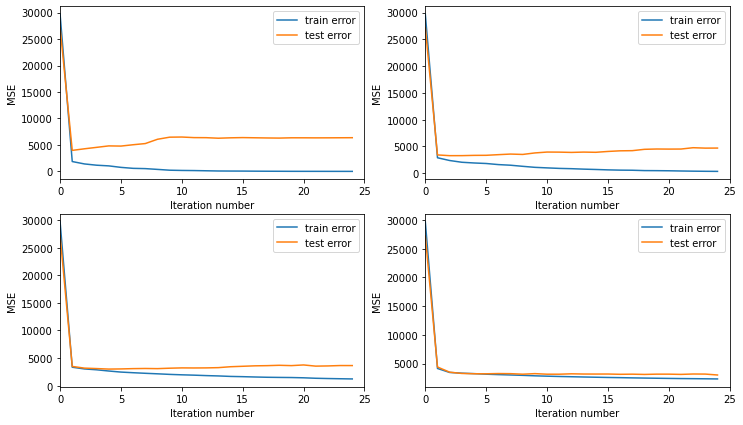

In [147]:
get_error_plot_depth(n_trees, train_errors, test_errors, train_errors_1, test_errors_1, train_errors_2, test_errors_2, train_errors_3, test_errors_3)

Тут видно, что если увеличвать значение максимальной глубины, растет степень переобучения, а если уменьшить, то она падает. В конкретной задаче меньшее значение корректнее.